In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../data/'

In [5]:
df = pd.read_csv(r'C:\Users\Hotu Ram\OneDrive\Desktop\python\Credit Card Froud Detection\MNCCredit scoring engine\credit-risk-modeling-with-LDPs\data_fs.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [10]:
print("Age: ", df['Age'].unique())
print("Sex: ", df['Sex'].unique())
print("Job: ", df['Job'].unique())
print("Housing: ", df['Housing'].unique())
print("Saving accounts: ", df['Saving accounts'].unique())
print("Checking account: ", df['Checking account'].unique())
# print("Credit amount: ", df['Credit amount'].unique())
# print("Duration: ", df['Duration'].unique())
print("Purpose: ", df['Purpose'].unique())

Age:  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Sex:  ['male' 'female']
Job:  [2 1 3 0]
Housing:  ['own' 'free' 'rent']
Saving accounts:  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account:  ['little' 'moderate' nan 'rich']
Purpose:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


<AxesSubplot:>

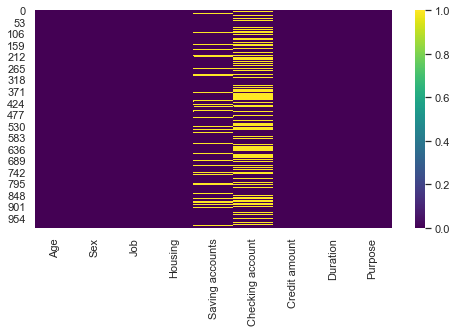

In [11]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull(),cmap='viridis')

Roughly 20% of Saving accounts data as well as 40% of Checking account data is missing. Looking at the Chacking account column, it looks like we have missing too much of that data at very basic level..



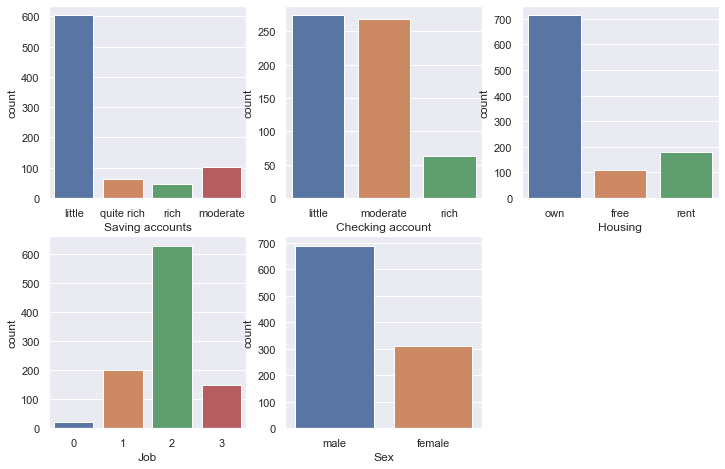

In [12]:
plt.figure(figsize=(12,12))
r,c=3,3
plt.subplot(r,c,1)
sns.countplot(df['Saving accounts']);

plt.subplot(r,c,2)
sns.countplot(df['Checking account']);

plt.subplot(r,c,3)
sns.countplot(df['Housing']);

plt.subplot(r,c,4)
sns.countplot(df['Job']);

plt.subplot(r,c,5)
sns.countplot(df['Sex']);

# plt.subplot(r,c,6)


As we see in above plots.    
1. In saving accounts plot we clearly see that 60% people have little type saving accounts and If we want to target       majority of people than we have to make a plan for people who have little type of saving accounts.    
2. In checking account plot, liitle and moderate have almost equal 26% watege.    
3. In Housing we see that 70% people have there own house.    
4. In job plot we see that categary 2 have more than 60% of people      
5. In sex plot we see that almost 70% of people are maale.      
   



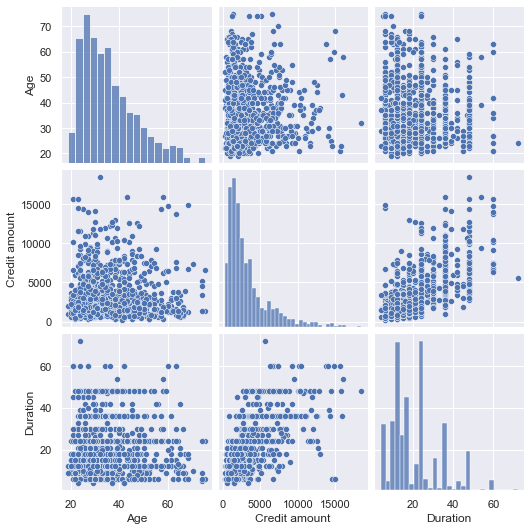

In [14]:
sns.pairplot(df[['Age','Credit amount', 'Duration']])

1. As we in plot between credit amount and Duretion as duration increses the credit ammount is also increses.
2. In plot between credit amount and Age majority of people lies in below 5000 credit amount regardless of their Age.

[Text(0.5, 0, '')]

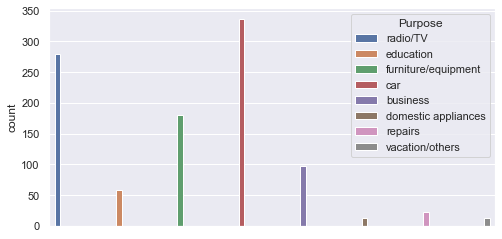

In [106]:
g1= sns.countplot(df['Purpose'], hue='Purpose', data=df);
g1.set(xticklabels=[])
g1.set(xlabel=None)

In Purpose plot we see that 50% of people credit amount for car & radio/TV.

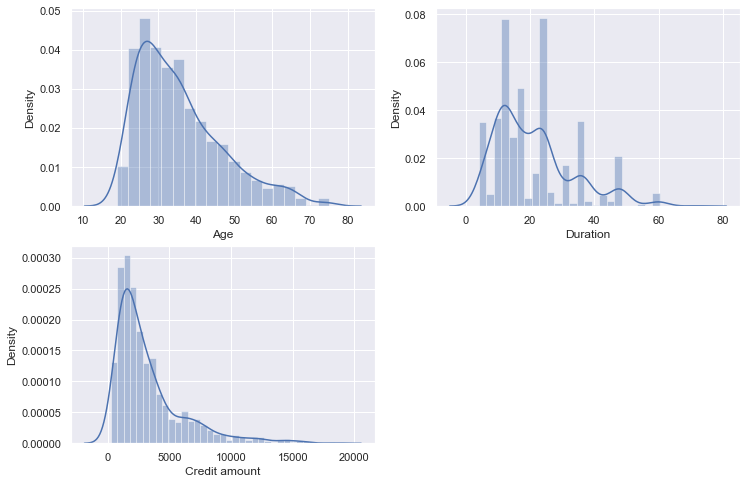

In [85]:
r,c=2,2
plt.figure(figsize=(12,8))
plt.subplot(r,c,1)
sns.distplot(df['Age']);

plt.subplot(r,c,2)
sns.distplot(df['Duration']);

plt.subplot(r,c,3)
sns.distplot(df['Credit amount']);

In [ ]:
In Age plot people bwtween age of 20 to 30 have credit account.
In Dureation plot maximum people lies in 10 to 20 time period.
In Credit amount plot majority of people credit the amount between range 0 to 5000.  

<AxesSubplot:>

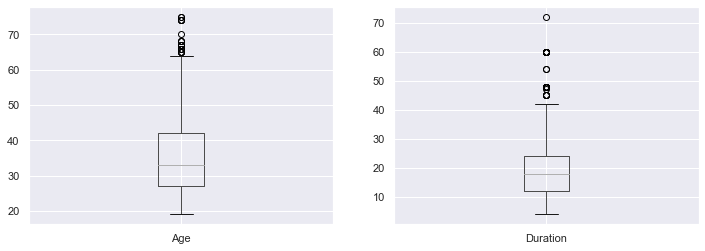

In [120]:
r,c=1,2
plt.figure(figsize=(12,4))
plt.subplot(r,c,1)
df.boxplot(['Age'])

plt.subplot(r,c,2)
df.boxplot(['Duration'])


In [3]:
# mae, mse 
xgboost  = [0.4402833266245564,.3134998249865217]
# mae = 0.4402833266245564
# mse = 3134998249865217

Adaboost = [0.47994612092996974,0.3483535426096638]
# mae : 0.47994612092996974
# mse : 0.3483535426096638


In [4]:
Adaboost+xgboost

[0.47994612092996974,
 0.3483535426096638,
 0.4402833266245564,
 0.3134998249865217]

In [5]:
# Results of xgboost and adaboost

Text(0.5, 1.0, 'MAE,MSE')

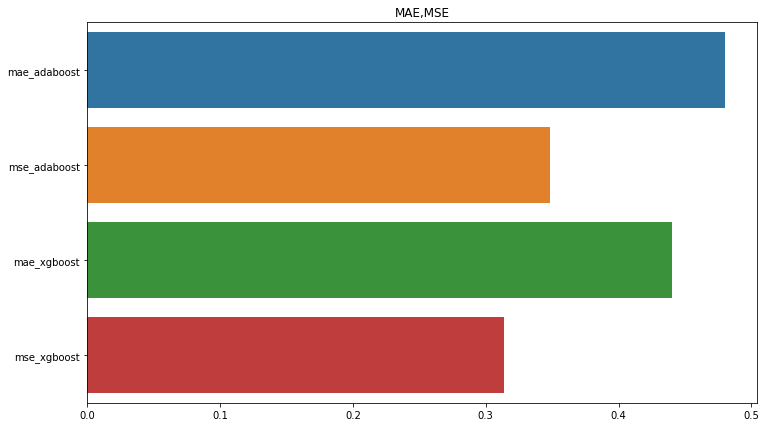

In [9]:
plt.figure(figsize=(12,7))
sns.barplot(Adaboost+xgboost,y=['mae_adaboost','mse_adaboost','mae_xgboost','mse_xgboost'],)
plt.title('MAE,MSE')